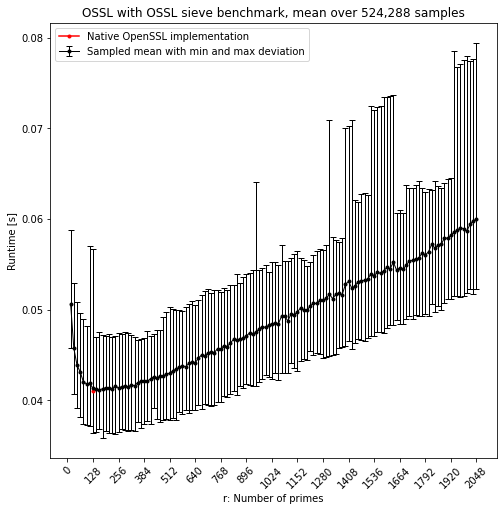

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d

stock_files = sorted(glob("../data/openssl_benchmark/openssl_sieve/4thrun_r*.csv"))
df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)

#create vec with truth vars if some condition met
#l_small = df2['r'] <= 1024

df = df.groupby(['r', ' l']).agg(["mean", "max", "min"]).reset_index() #for final 64x runs
#df.columns = df.columns.str.strip()


minmax = [df[(" avgruntime", "mean")].to_numpy() - df[(" avgruntime", "min")].to_numpy(), df[(" avgruntime", "max")].to_numpy() - df[(" avgruntime", "mean")].to_numpy()]
#2d
fig = df.plot(x='r', y=(" avgruntime", "mean"), marker=".", yerr=minmax, color="black", linewidth=1, capsize=3, legend=None, figsize=(8,8), label="Sampled mean with min and max deviation")
fig.set_title("OSSL with OSSL sieve benchmark, mean over 524,288 samples")
fig.set_ylabel("Runtime [s]")
fig.set_xlabel("r: Number of primes")
fig.set_xticks(np.arange(0, 2176, 128))
fig.set_xticklabels(np.arange(0, 2176, 128), rotation=45)
fig.plot(128, 0.041, color='red', marker=".", label='Native OpenSSL implementation')
fig.legend()

""" #3d
fig = df.plot.scatter(x=0, y=1, c=2, colormap="viridis", sharex=False, figsize=(6,2.5))
fig.set_title("NSS with NSS sieve benchmark, mean over 524,288 samples")
"""

fig.figure.savefig("../plots/4th_ossl_ossl.jpg", bbox_inches = "tight", dpi=300) 